In [82]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import seaborn as sns 
import matplotlib.pyplot as plt


In [83]:
base_url = 'https://www.bpmdatabase.com/music/search/?artist=Snoop+Dogg&page='
all_data = []
headers = None

for page in range(1, 15):
    url = base_url + str(page)
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    table = soup.find('table', {'class': 'table table-bordered table-condensed table-striped'})

    if headers is None:
        headers = [header.text.strip() for header in table.find_all('th')]

    rows = table.find_all('tr')[1:]
    data = []

    for row in rows:
        data.append([cell.text.strip() for cell in row.find_all('td')])

    all_data.append(pd.DataFrame(data, columns=headers))


In [84]:
df = pd.concat(all_data, ignore_index=True)
df


,Artist,Title,Mix,BPM,Genre,Label,Year
0,"2Pac, Chris Starr, T.I. ft. Snoop Dogg",Pac's Life,—,95,—,Interscope,2006
1,2Pac ft. Snoop Dogg,2 Of Americaz Most Wanted,—,99,Rock,Death Row/Interscope,2013
2,2 Pac w/ Snoop Doggy Dogg,2 Of Amerikkaz Most Wanted,—,99,Hip-Hop,Death Row/interscope Records,1996
3,"40 Glocc ft. Sevin, E-40, Snoop Dogg, Too Shor...",Welcome To California,Instrumental,81,—,Zoolife,2011
4,"40 Glocc ft. Sevin, E-40, Snoop Dogg, Too Shor...",Welcome To California,Clean Edit,81,Urban,Zoolife,2011
...,...,...,...,...,...,...,...
373,Wiz Khalifa ft. Snoop Dogg & Ty Dolla $ign,You & Your Friends,EXPLICIT,97,Urban,Rostrum/Atlantic,2015
374,Wiz Khalifa ft. Snoop Dogg & Ty Dolla $ign,You & Your Friends,Clean,97,Hip-Hop,Rostrum/Atlantic,2014
375,Wiz Khalifa ft. Snoop Dogg & Ty Dolla $ign,You & Your Friends,Quick Edit,97,Hip-Hop,Rostrum/Atlantic,2014
376,Wiz Khalifa ft. Snoop Dogg & Ty Dolla $ign,You & Your Friends,—,97,Urban,Rostrum/Atlantic,2015


In [85]:
#cleaning the data

#replacing NA values with N/A values
df.replace('—', 'N/A', inplace=True)

#deleting empty rows
df.head(30)
df = df.mask(df.astype(object).eq('None')).dropna()
df = df.set_index(df.columns[0])
df = df.reset_index()
df.head(40)


,Artist,Title,Mix,BPM,Genre,Label,Year
0,"2Pac, Chris Starr, T.I. ft. Snoop Dogg",Pac's Life,N/A,95,N/A,Interscope,2006
1,2Pac ft. Snoop Dogg,2 Of Americaz Most Wanted,N/A,99,Rock,Death Row/Interscope,2013
2,2 Pac w/ Snoop Doggy Dogg,2 Of Amerikkaz Most Wanted,N/A,99,Hip-Hop,Death Row/interscope Records,1996
3,"40 Glocc ft. Sevin, E-40, Snoop Dogg, Too Shor...",Welcome To California,Instrumental,81,N/A,Zoolife,2011
4,"40 Glocc ft. Sevin, E-40, Snoop Dogg, Too Shor...",Welcome To California,Clean Edit,81,Urban,Zoolife,2011
5,"40 Glocc ft. Sevin, E-40, Snoop Dogg, Too Shor...",Welcome To California,N/A,81,N/A,Zoolife,2011
6,"40 Glocc ft. Sevin, E-40, Snoop Dogg, Too Shor...",Welcome To California,(Explicit),82,N/A,Zoolife,2011
7,50 Cent Feat. Snoop Dogg And Lloyd Banks & You...,P.i.m.p.,Remix,85,N/A,Shady/aftermath/interscope Records,2003
8,50 Cent ft. Snoop Dogg & G-Unit,P.I.M.P.,Remix,85,N/A,Shady/Aftermath/Interscope,2007
9,50 Cent ft. Snoop Dogg & G-Unit,P.I.M.P.,N/A,85,Urban,Shady/Aftermath/Interscope,2007


In [86]:
import pandas as pd
import re

def extract_artists(song):
    song = re.sub(r'( ft\. | w/ | with | WITH | & |, | and | AND | Ft. | Feat. | And | Introducing | f/ | With |/| Presents | Pres | Featuring | Feat | introducing | Pres. | vs | , &)', ',', song)
    artists = [artist.strip() for artist in song.split(',') if artist.strip()]
    return artists, len(artists)

artists_df = pd.DataFrame(df['Artist'].apply(extract_artists).tolist(), columns=['Artists', 'Number of Artists'])
artists_df = pd.concat([artists_df.drop('Artists', axis=1), artists_df['Artists'].apply(pd.Series)], axis=1)

artists_df.columns = ['Number of Artists'] + [f'Artist_{i}' for i in range(1, artists_df.shape[1])]

df = pd.concat([df, artists_df], axis=1)
df.head(40)

,Artist,Title,Mix,BPM,Genre,Label,Year,Number of Artists,Artist_1,Artist_2,Artist_3,Artist_4,Artist_5,Artist_6
0,"2Pac, Chris Starr, T.I. ft. Snoop Dogg",Pac's Life,N/A,95,N/A,Interscope,2006,4,2Pac,Chris Starr,T.I.,Snoop Dogg,NaN,NaN
1,2Pac ft. Snoop Dogg,2 Of Americaz Most Wanted,N/A,99,Rock,Death Row/Interscope,2013,2,2Pac,Snoop Dogg,NaN,NaN,NaN,NaN
2,2 Pac w/ Snoop Doggy Dogg,2 Of Amerikkaz Most Wanted,N/A,99,Hip-Hop,Death Row/interscope Records,1996,2,2 Pac,Snoop Doggy Dogg,NaN,NaN,NaN,NaN
3,"40 Glocc ft. Sevin, E-40, Snoop Dogg, Too Shor...",Welcome To California,Instrumental,81,N/A,Zoolife,2011,6,40 Glocc,Sevin,E-40,Snoop Dogg,Too Short,& Xzibit
4,"40 Glocc ft. Sevin, E-40, Snoop Dogg, Too Shor...",Welcome To California,Clean Edit,81,Urban,Zoolife,2011,6,40 Glocc,Sevin,E-40,Snoop Dogg,Too Short,& Xzibit
5,"40 Glocc ft. Sevin, E-40, Snoop Dogg, Too Shor...",Welcome To California,N/A,81,N/A,Zoolife,2011,6,40 Glocc,Sevin,E-40,Snoop Dogg,Too Short,& Xzibit
6,"40 Glocc ft. Sevin, E-40, Snoop Dogg, Too Shor...",Welcome To California,(Explicit),82,N/A,Zoolife,2011,6,40 Glocc,Sevin,E-40,Snoop Dogg,Too Short,& Xzibit
7,50 Cent Feat. Snoop Dogg And Lloyd Banks & You...,P.i.m.p.,Remix,85,N/A,Shady/aftermath/interscope Records,2003,4,50 Cent,Snoop Dogg,Lloyd Banks,Young Buck of G-Unit,NaN,NaN
8,50 Cent ft. Snoop Dogg & G-Unit,P.I.M.P.,Remix,85,N/A,Shady/Aftermath/Interscope,2007,3,50 Cent,Snoop Dogg,G-Unit,NaN,NaN,NaN
9,50 Cent ft. Snoop Dogg & G-Unit,P.I.M.P.,N/A,85,Urban,Shady/Aftermath/Interscope,2007,3,50 Cent,Snoop Dogg,G-Unit,NaN,NaN,NaN


In [87]:
df.dtypes


Artist               object
Title                object
Mix                  object
BPM                  object
Genre                object
Label                object
Year                 object
Number of Artists     int64
Artist_1             object
Artist_2             object
Artist_3             object
Artist_4             object
Artist_5             object
Artist_6             object
dtype: object

In [88]:
df.corr()

C:\Users\Stoner2\AppData\Local\Temp\ipykernel_18464\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Number of Artists
Number of Artists,1.0


In [89]:
df['BPM'] = df['BPM'].astype(int)
df['Title'] = df['Title'].replace('HIgh Off The Fame', 'High Off The Fame')


In [90]:
df.to_csv("snoop_dogg_songs.csv")

Text(0.5, 1.0, 'Bar Plot')

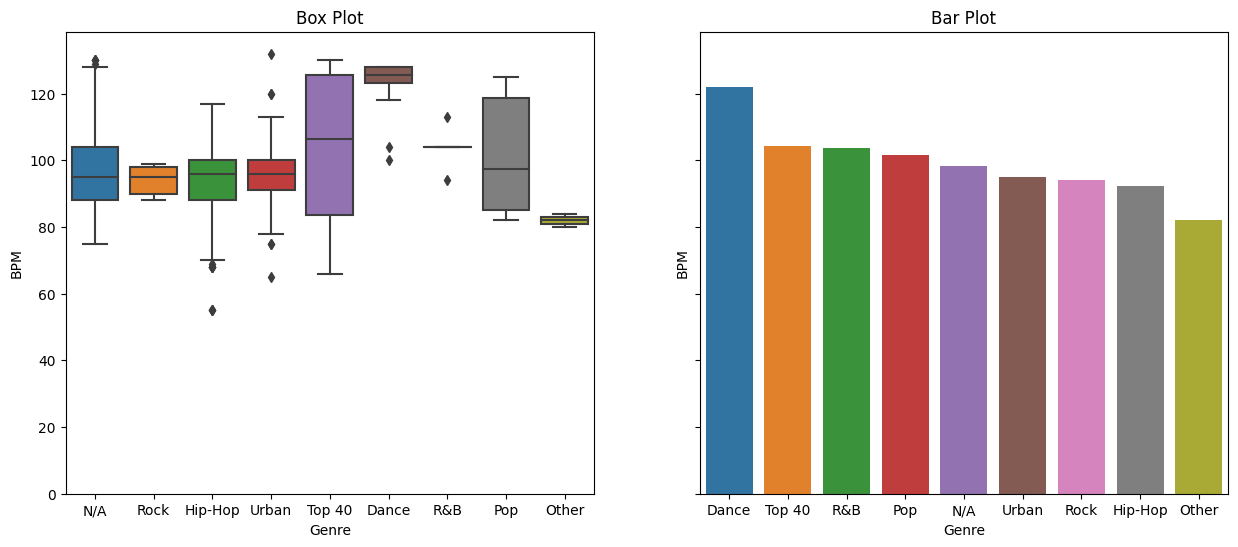

In [91]:
# What is the distribution of BPM across different genres?
# What is the average BPM for songs in each genre?

GenreBPM = df.groupby('Genre')['BPM'].mean().reset_index()
sortedBPM = GenreBPM.sort_values(by='BPM', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

sns.boxplot(data=df, x='Genre', y='BPM', ax=axes[0])
axes[0].set_title('Box Plot')

sns.barplot(data=sortedBPM, x='Genre', y='BPM', ax=axes[1])
axes[1].set_title('Bar Plot')






<AxesSubplot: xlabel='Year', ylabel='BPM'>

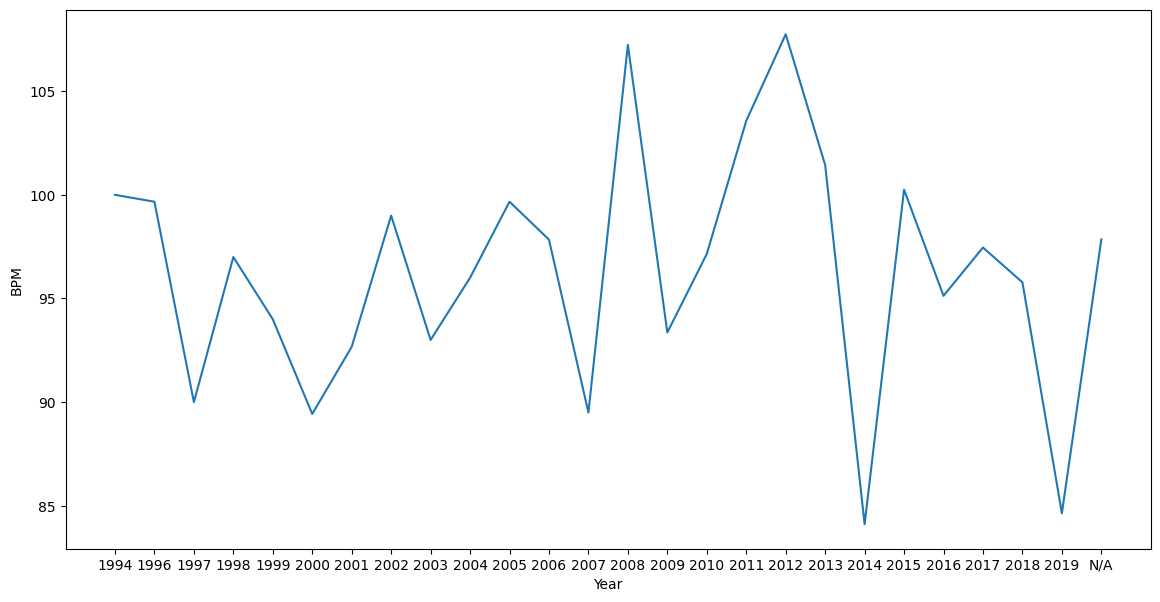

In [92]:
#How has the average BPM changed over the years?

YearBPM = df.groupby('Year')['BPM'].mean().reset_index()
YearBPM = YearBPM.round(2)

plt.figure(figsize=(14, 7))
sns.lineplot(data=YearBPM, x = "Year", y = "BPM")

<AxesSubplot: xlabel='Number of Artists', ylabel='BPM'>

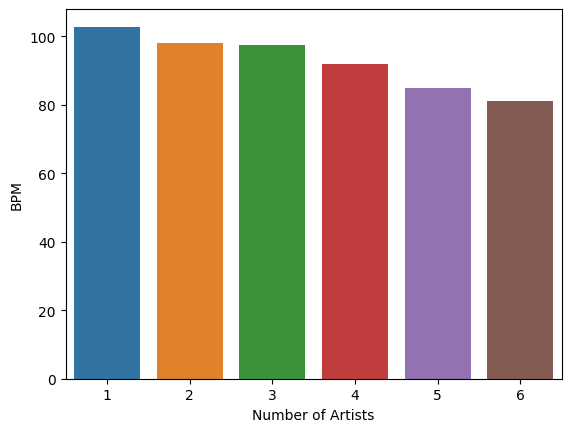

In [93]:
#What is the relationship between the number of artists in a song and the BPM?
NumberArtistsBPM = df.groupby('Number of Artists')['BPM'].mean().reset_index()
sns.barplot(data=NumberArtistsBPM, x='Number of Artists', y='BPM')


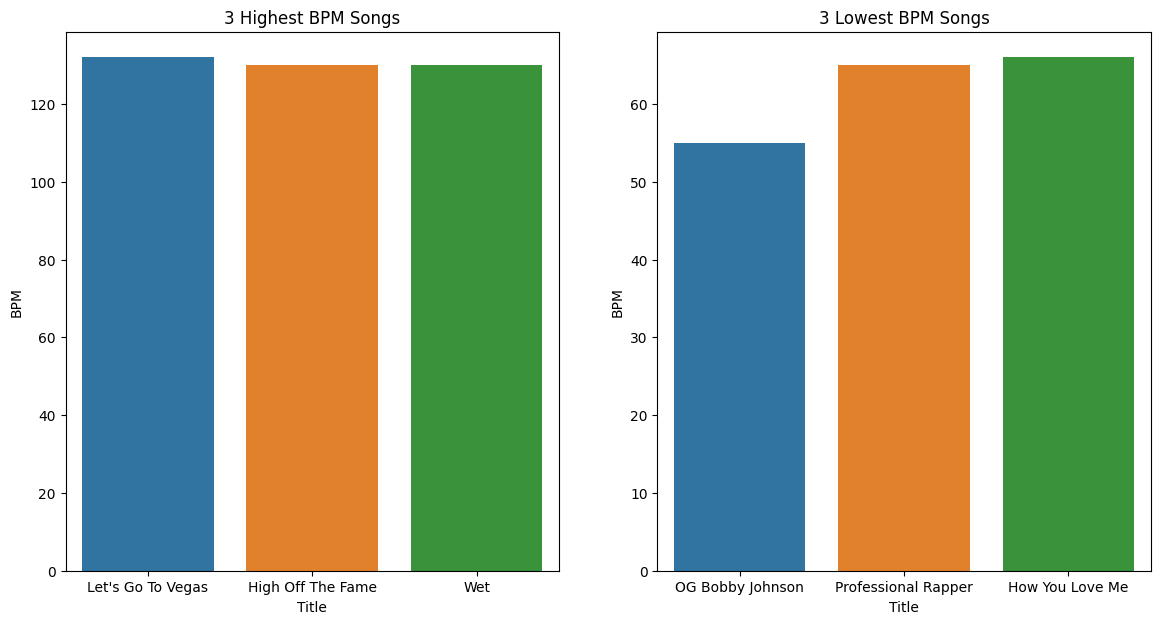

In [94]:
unique_songs = df.drop_duplicates(subset='Title')

highest_bpm_songs = unique_songs.nlargest(3, 'BPM')
lowest_bpm_songs = unique_songs.nsmallest(3, 'BPM')

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

sns.barplot(ax=axes[0], data=highest_bpm_songs, x='Title', y='BPM')
axes[0].set_title('3 Highest BPM Songs')

sns.barplot(ax=axes[1], data=lowest_bpm_songs, x='Title', y='BPM')
axes[1].set_title('3 Lowest BPM Songs')

plt.show()

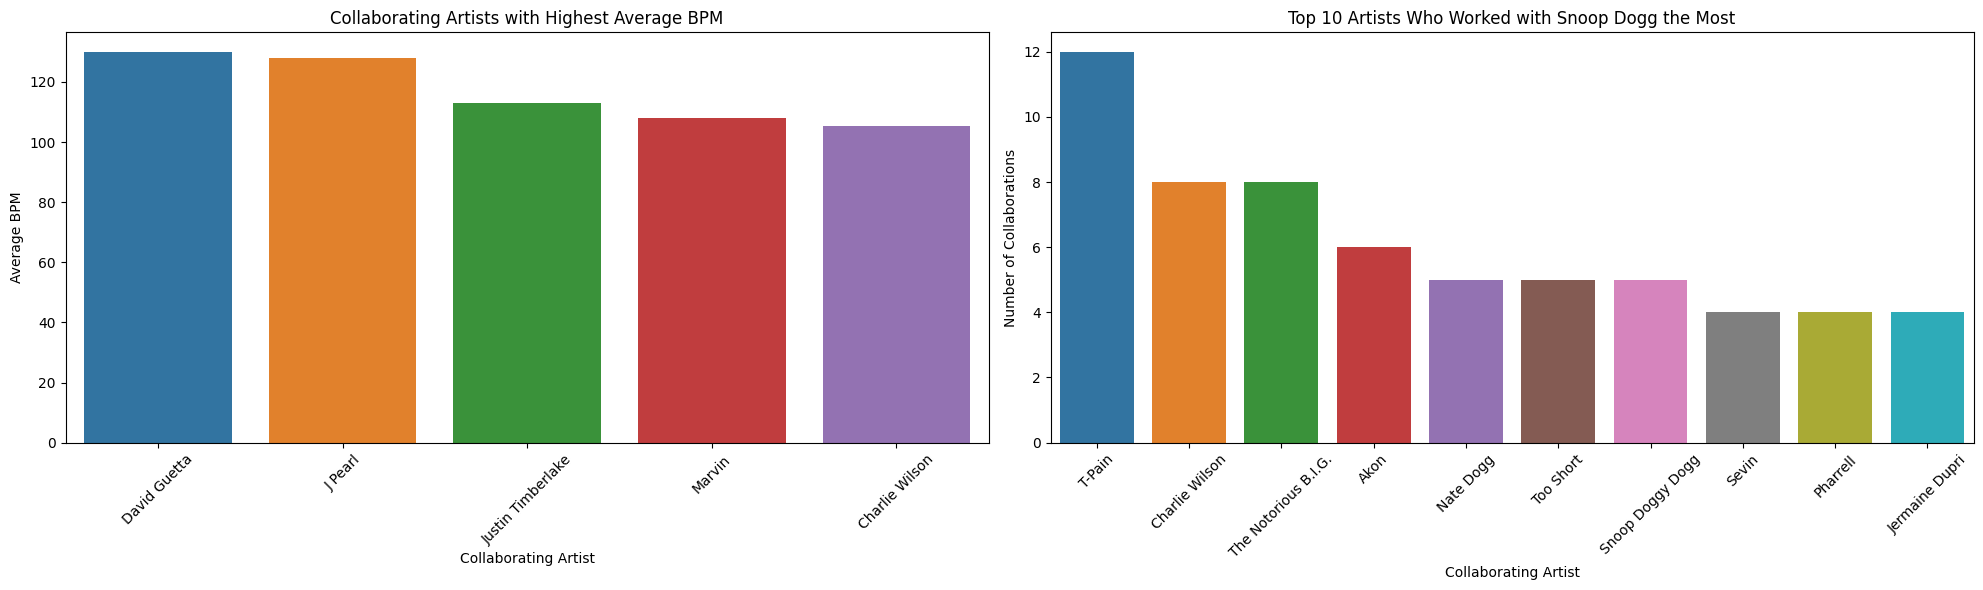

In [95]:
df = df[df['Artist_2'] != 'Snoop Dogg']

grouped_artists = df.groupby('Artist_2', as_index=False).agg({'BPM': 'mean', 'Title': 'count'})
grouped_artists_by_bpm = grouped_artists.sort_values(by='BPM', ascending=False).head(5)
grouped_artists_by_count = grouped_artists.sort_values(by='Title', ascending=False).head(10)

fig, axes = plt.subplots(1, 2, figsize=(20, 6))

sns.barplot(ax=axes[0], data=grouped_artists_by_bpm, x='Artist_2', y='BPM')
axes[0].set_title('Collaborating Artists with Highest Average BPM')
axes[0].set_xlabel('Collaborating Artist')
axes[0].set_ylabel('Average BPM')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(ax=axes[1], data=grouped_artists_by_count, x='Artist_2', y='Title')
axes[1].set_title('Top 10 Artists Who Worked with Snoop Dogg the Most')
axes[1].set_xlabel('Collaborating Artist')
axes[1].set_ylabel('Number of Collaborations')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [96]:
df = df[df['Artist_2'] != 'Snoop Dogg']

grouped_artists = df.groupby('Artist_2', as_index=False).agg({'BPM': 'mean', 'Title': 'count'})
grouped_artists = grouped_artists.sort_values(by='Title', ascending=False)
grouped_artists = grouped_artists.rename(columns={'Artist_2': 'Collaborating Artist', 'Title': '# Collaborations', 'BPM': 'Average BPM'})
grouped_artists = grouped_artists.set_index('Collaborating Artist')

grouped_artists

,Average BPM,# Collaborations
Collaborating Artist,,
T-Pain,91.50,12
Charlie Wilson,105.50,8
The Notorious B.I.G.,104.50,8
Akon,95.50,6
Nate Dogg,91.80,5
Too Short,98.00,5
Snoop Doggy Dogg,98.20,5
Sevin,81.25,4
Pharrell,97.75,4


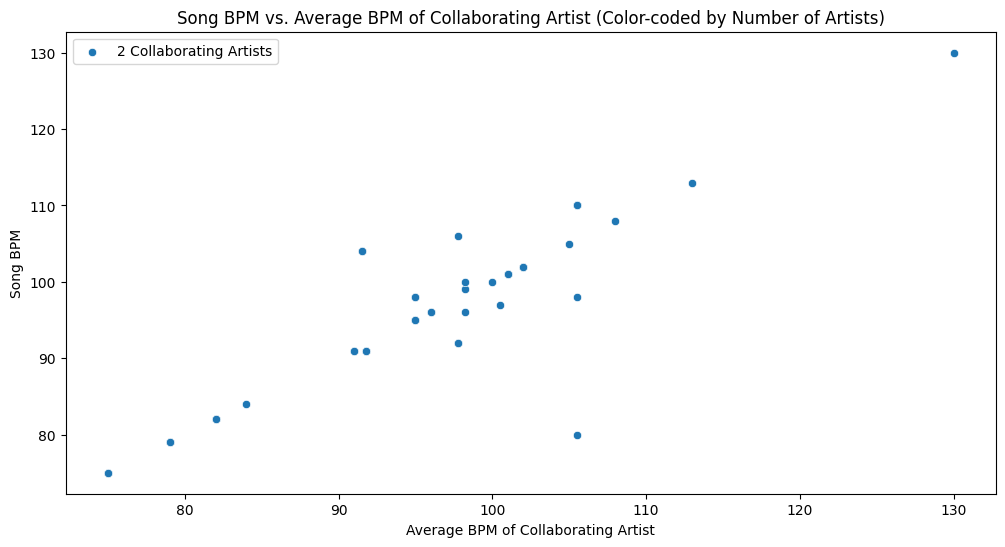

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
df_merged = df.merge(grouped_artists, left_on='Artist_2', right_on='Collaborating Artist', how='left')
df_filtered = df_merged.dropna(subset=['Number of Artists', 'Average BPM', 'BPM'])

df_filtered_2 = df_filtered[df_filtered['Number of Artists'] == 2]

plt.figure(figsize=(12, 6))

sns.scatterplot(x='Average BPM', y='BPM', data=df_filtered_2, label='2 Collaborating Artists')

plt.xlabel('Average BPM of Collaborating Artist')
plt.ylabel('Song BPM')
plt.title('Song BPM vs. Average BPM of Collaborating Artist (Color-coded by Number of Artists)')
plt.legend()
plt.show()

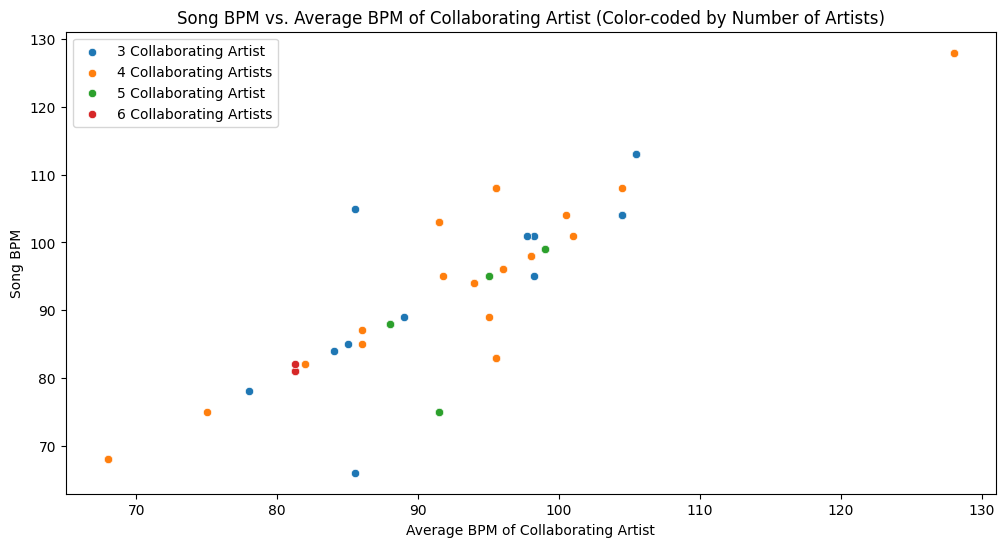

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
df_merged = df.merge(grouped_artists, left_on='Artist_2', right_on='Collaborating Artist', how='left')
df_filtered = df_merged.dropna(subset=['Number of Artists', 'Average BPM', 'BPM'])

# Filter the data for songs with 1 or 2 collaborating artists
df_filtered_3 = df_filtered[df_filtered['Number of Artists'] == 3]
df_filtered_4 = df_filtered[df_filtered['Number of Artists'] == 4]
df_filtered_5 = df_filtered[df_filtered['Number of Artists'] == 5]
df_filtered_6 = df_filtered[df_filtered['Number of Artists'] == 6]

plt.figure(figsize=(12, 6))

sns.scatterplot(x='Average BPM', y='BPM', data=df_filtered_3, label='3 Collaborating Artist')
sns.scatterplot(x='Average BPM', y='BPM', data=df_filtered_4, label='4 Collaborating Artists')
sns.scatterplot(x='Average BPM', y='BPM', data=df_filtered_5, label='5 Collaborating Artist')
sns.scatterplot(x='Average BPM', y='BPM', data=df_filtered_6, label='6 Collaborating Artists')

plt.xlabel('Average BPM of Collaborating Artist')
plt.ylabel('Song BPM')
plt.title('Song BPM vs. Average BPM of Collaborating Artist (Color-coded by Number of Artists)')
plt.legend()
plt.show()